In [1]:
import torch
import torch.nn as nn
import torch_geometric
from src.layer.encoders import TrigonometricEncoder, WaveletCoefs

<Axes: >

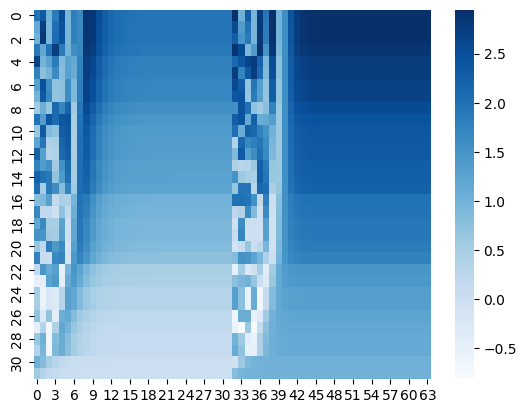

In [2]:
import numpy as np 
import seaborn as sns

eigvs = torch.tensor(np.random.uniform(0,2, (64, 32) ),
                      dtype=torch.float32).sort(
    axis=1,descending=True).values
d = 64

pe = TrigonometricEncoder(d, 100, project=False)
pos = pe(eigvs)
sns.heatmap(pos.detach()[0], cmap='Blues')

In [3]:
eigvs, Us = [], []
N = 32
B = 64
d = 64
for i in range(B):
    L = torch.randn((N,N))
    L = L@L.T
    eigv, U = torch.linalg.eigh(L)
    eigvs.append(eigv)
    Us.append(U)
eigvs = torch.stack(eigvs)
Us = torch.stack(Us)

J = 5
scale = torch.linspace(0.1, 10, J)
x = torch.randn((B, N, d))*0.1
eigvs = (2*eigvs/eigvs.max())


In [4]:
edge_index = torch.randint(0, N, (2,100))

In [5]:
import torch 
import torch.nn as nn
from src.layer.utils import FFN
from src.model.wavegc import WaveGCNet

In [6]:
model = WaveGCNet(d, d, 2, 3, 4, scale)

In [9]:
model(x, edge_index, Us, eigvs).shape

torch.Size([64, 32, 2])

In [8]:
Us.shape

torch.Size([64, 32, 32])